In [1]:

36.import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
data = pd.read_csv("Tesla.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
#spltting the dataset
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2193
Train data length : 1535
Validation data lenth : 658


In [6]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-01-07,25.000000
3,2010-02-07,23.000000
4,2010-06-07,20.000000
...,...,...
1530,2016-07-27,229.339996
1531,2016-07-28,227.949997
1532,2016-07-29,230.699997
1533,2016-01-08,235.500000


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1535,2016-03-08,227.369995
1536,2016-04-08,225.690002
1537,2016-05-08,230.000000
1538,2016-08-08,228.000000
1539,2016-09-08,226.820007
...,...,...
2188,2019-11-03,283.519989
2189,2019-12-03,286.489990
2190,2019-03-13,283.899994
2191,2019-03-14,292.450012


In [8]:
#3.Creating Train Dataset from Train split
dataset_train = train_data.Open.values
dataset_train.shape


(1535,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1535, 1)

In [10]:
#4.Normalization / Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape


(1535, 1)

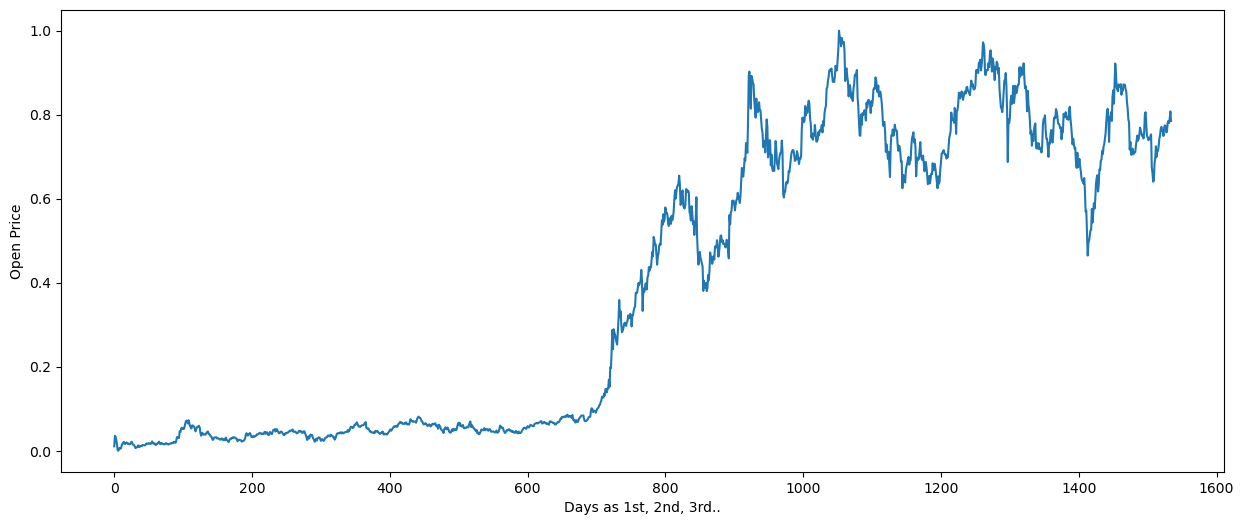

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
#Creating X_train and y_train from Train data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1485, 50, 1)
Shape of y_train after reshape : (1485, 1)


In [14]:
#6.Creating RNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(    SimpleRNN(units = 50,activation = "tanh", return_sequences = True, 
              input_shape = (X_train.shape[1],1)) )

regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization

regressor.add( SimpleRNN(units = 50, activation = "tanh", return_sequences = True) )

regressor.add(    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
47/47 [==============================] - 4s 20ms/step - loss: 0.4005 - accuracy: 6.7340e-04
Epoch 2/50
47/47 [==============================] - 1s 20ms/step - loss: 0.2275 - accuracy: 0.0000e+00
Epoch 3/50
47/47 [==============================] - 1s 20ms/step - loss: 0.1426 - accuracy: 0.0000e+00
Epoch 4/50
47/47 [==============================] - 1s 19ms/step - loss: 0.1000 - accuracy: 6.7340e-04
Epoch 5/50
47/47 [==============================] - 1s 20ms/step - loss: 0.0778 - accuracy: 6.7340e-04
Epoch 6/50
47/47 [==============================] - 1s 20ms/step - loss: 0.0612 - accuracy: 0.0000e+00
Epoch 7/50
47/47 [==============================] - 1s 20ms/step - loss: 0.0490 - accuracy: 6.7340e-04
Epoch 8/50
47/47 [==============================] - 1s 20ms/step - loss: 0.0404 - accuracy: 6.7340e-04
Epoch 9/50
47/47 [==============================] - 1s 20ms/step - loss: 0.0369 - accuracy: 6.7340e-04
Epoch 10/50
47/47 [==============================] - 1s 19ms/step - loss:

In [55]:
#7.Evaluating Model
history.history["loss"]

[0.332781046628952,
 0.15966971218585968,
 0.11516144871711731,
 0.08390764892101288,
 0.06706452369689941,
 0.05048580467700958,
 0.04345080628991127,
 0.03521784767508507,
 0.03145395219326019,
 0.025002922862768173,
 0.02342020906507969,
 0.020551202818751335,
 0.019580338150262833,
 0.016069350764155388,
 0.01547106821089983,
 0.013962448574602604,
 0.013708330690860748,
 0.012458902783691883,
 0.011256407015025616,
 0.010362734086811543,
 0.010085321962833405,
 0.009263449348509312,
 0.009265981614589691,
 0.008971065282821655,
 0.008433477021753788,
 0.008282814174890518,
 0.007347922306507826,
 0.007107787765562534,
 0.007122241426259279,
 0.007161457557231188,
 0.006444944534450769,
 0.006044039037078619,
 0.005575953982770443,
 0.005970206577330828,
 0.0055656335316598415,
 0.0054801227524876595,
 0.005548074375838041,
 0.004310226999223232,
 0.004568768199533224,
 0.00416370015591383,
 0.004682319704443216,
 0.004189410246908665,
 0.004195582587271929,
 0.004410854075103998,


In [15]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

47/47 [==============================] - 1s 6ms/step


(1485, 1)

In [16]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1485, 1)

In [17]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (658, 1)


In [18]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [19]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [21]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

19/19 [==============================] - 0s 6ms/step
Shape of y_pred_of_test : (608, 1)


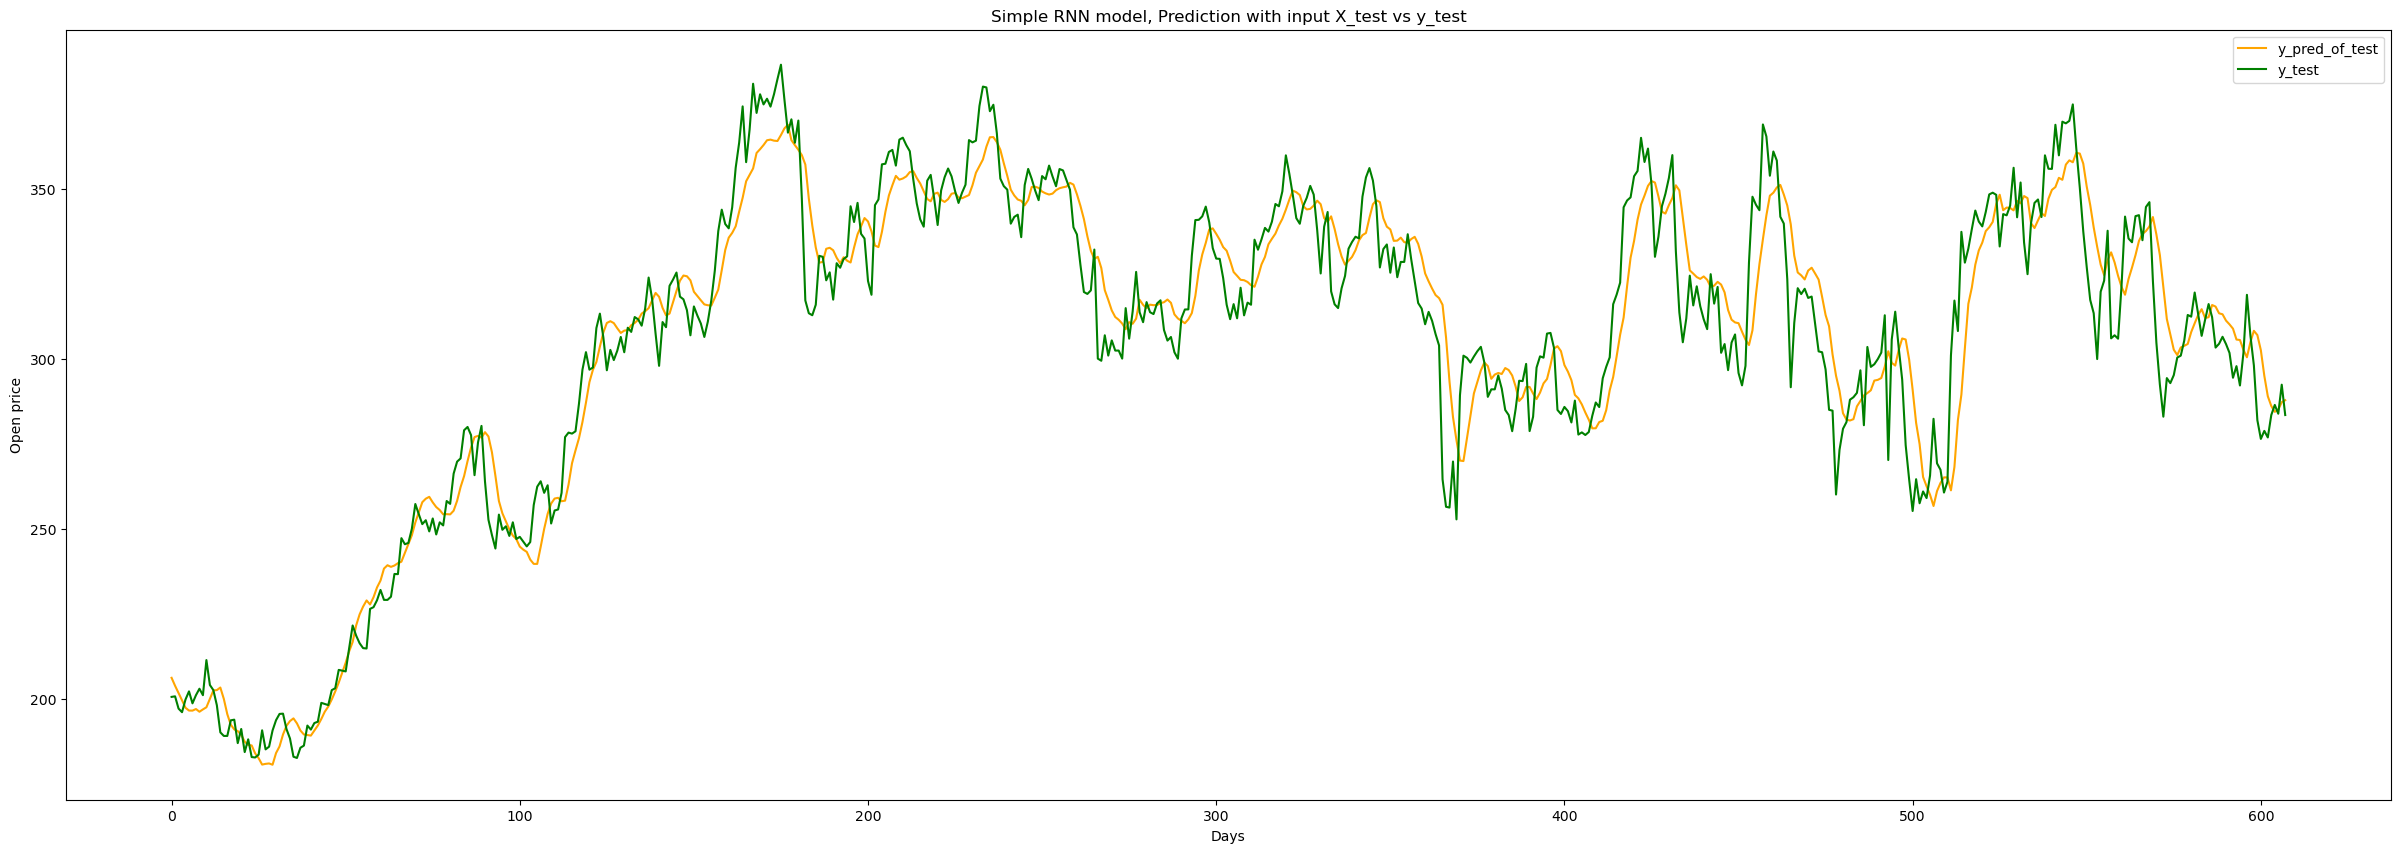

In [22]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

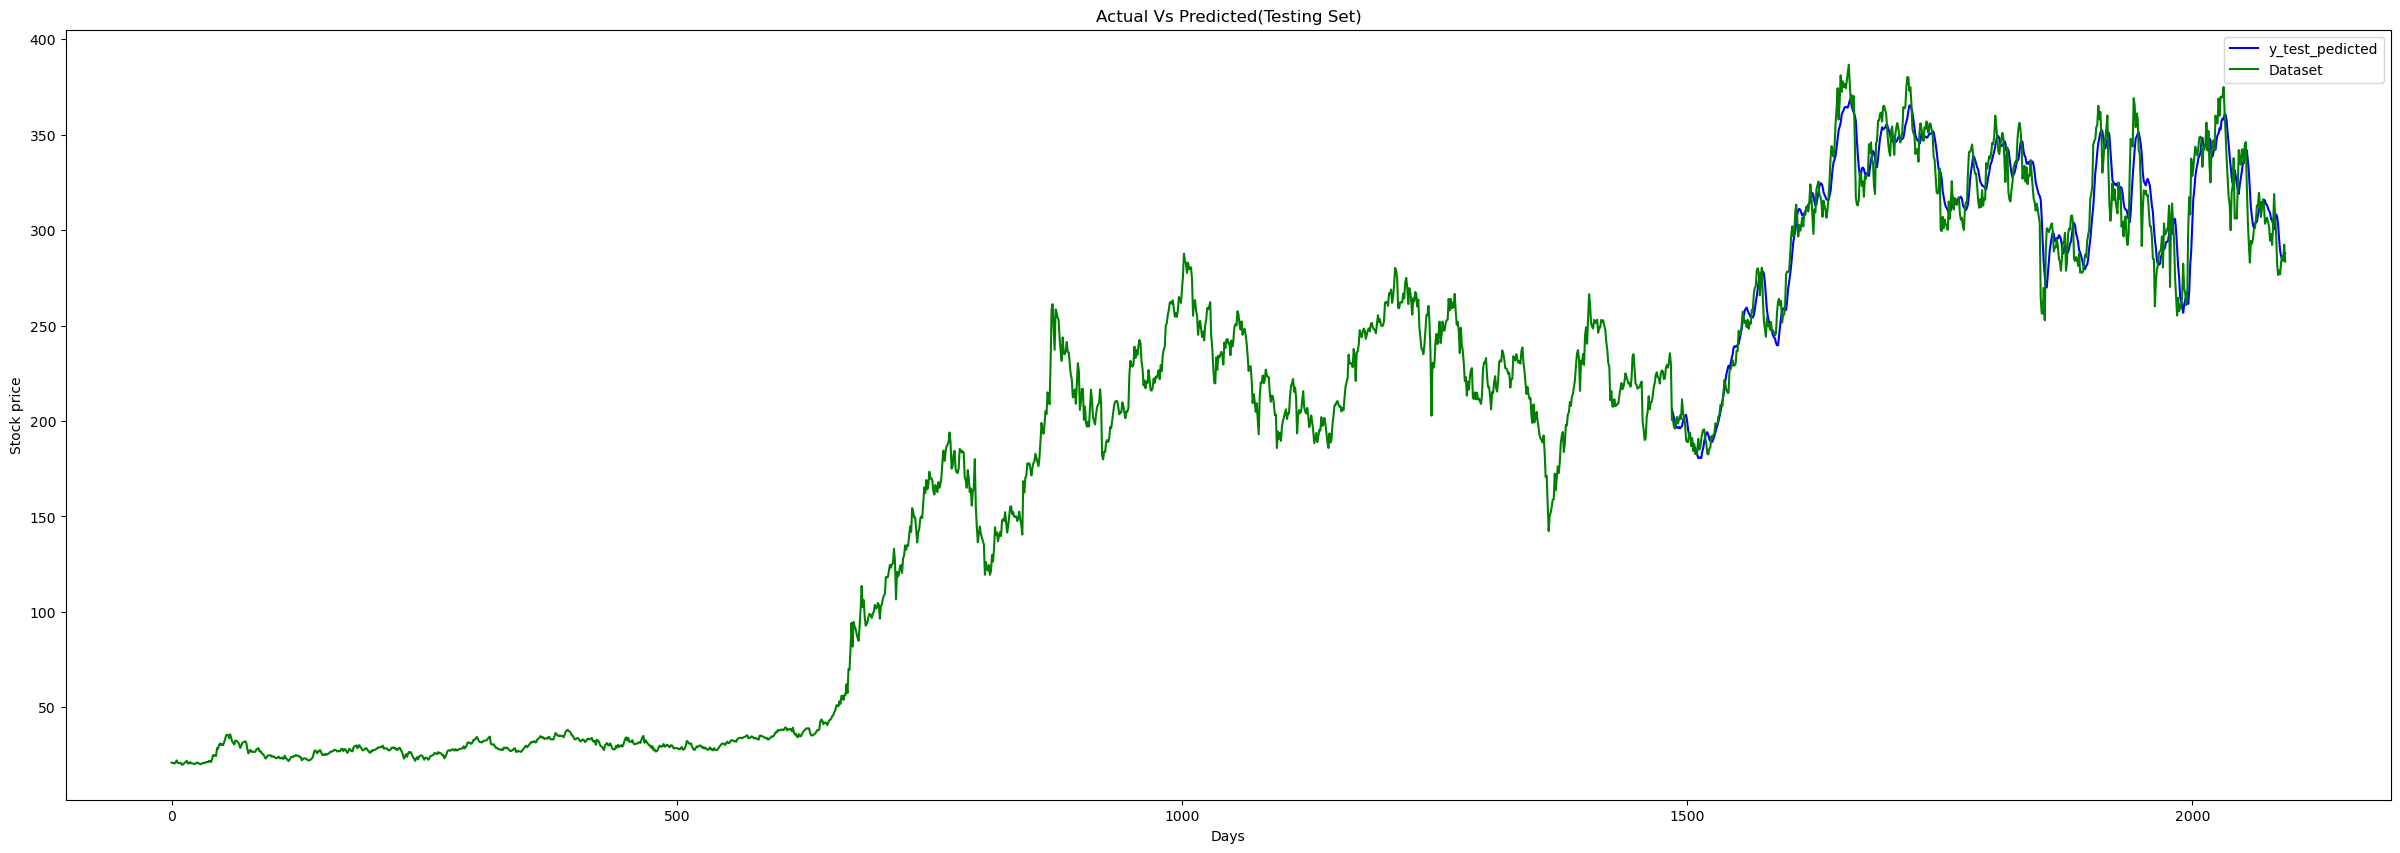

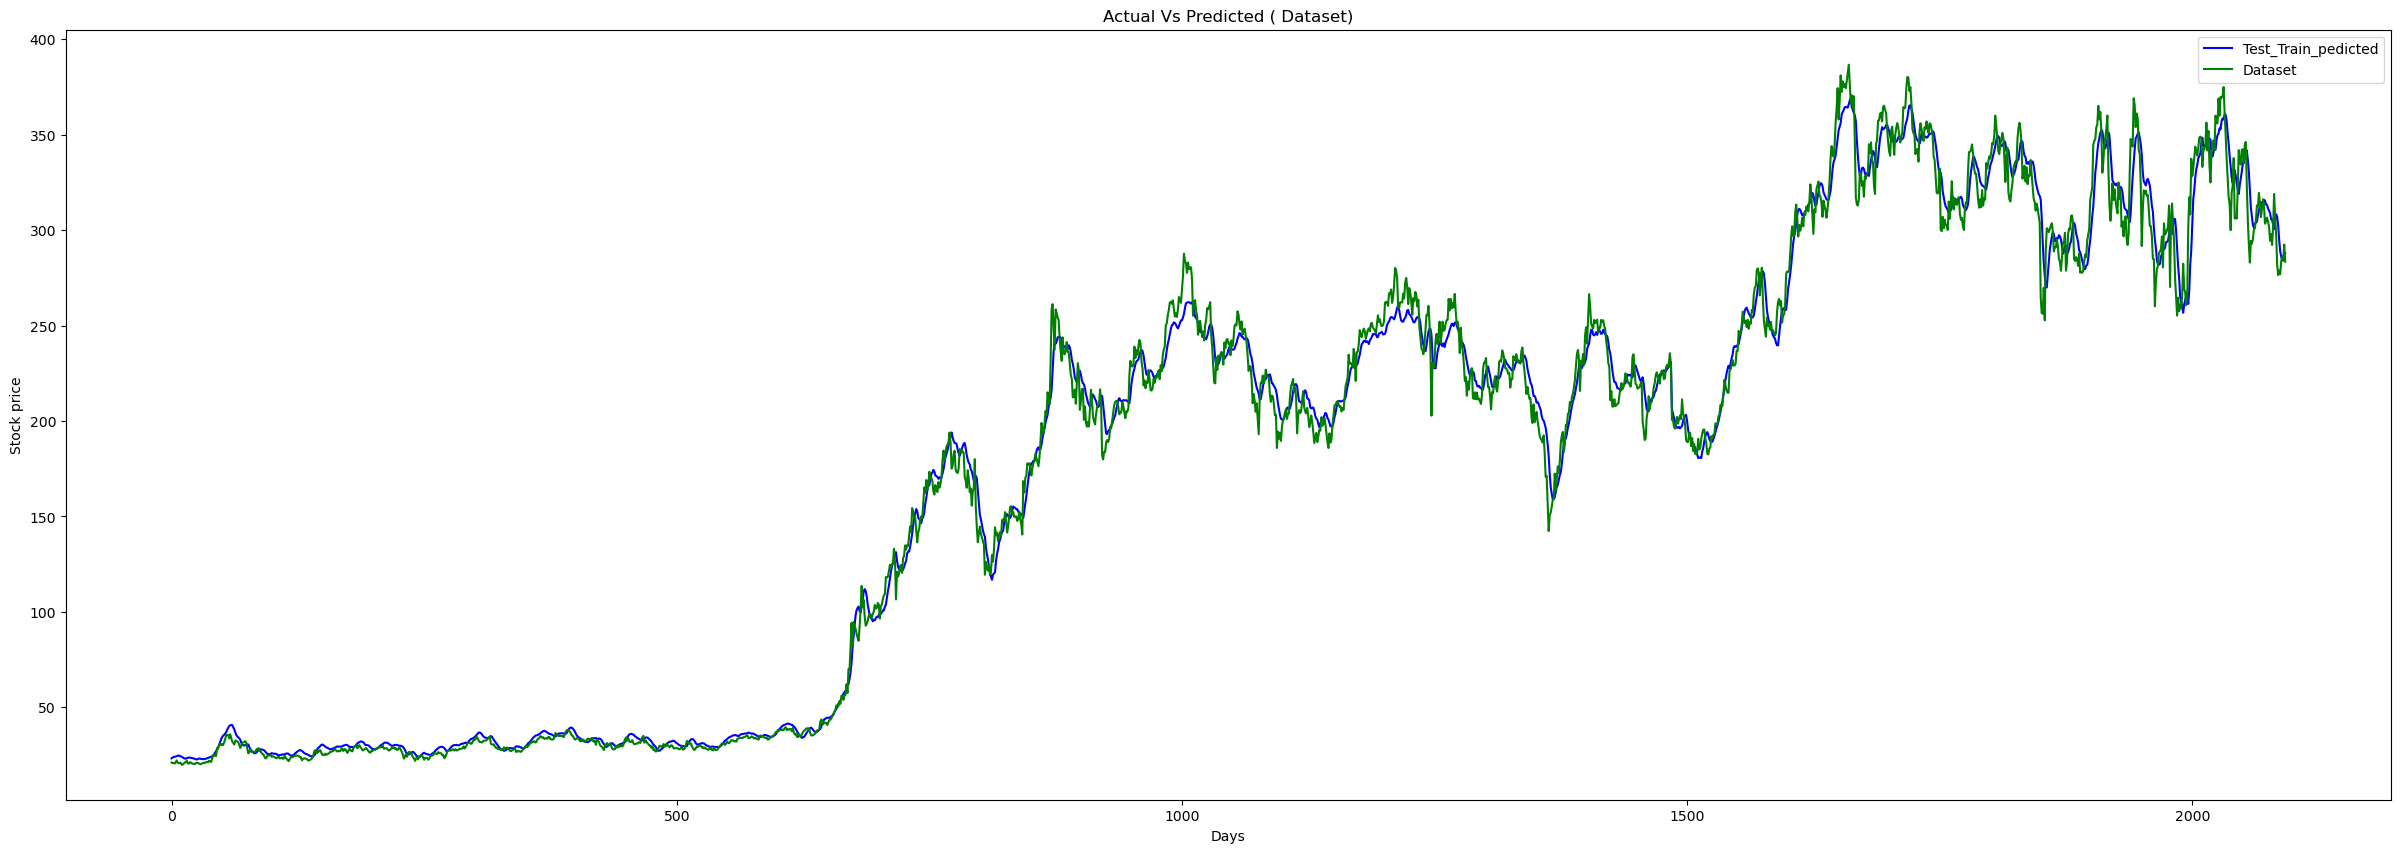

In [23]:

## visualisation
plt.figure(figsize = (30,10))
#plt.plot(np.concatenate([y_train,y_pred_of_test]), label = "y_pred_of_test", c = "orange")
plt.plot([None for _ in y_train] + [x for x in y_pred_of_test], label = "y_test_pedicted", c = "b")
plt.plot(np.concatenate([y_train,scaler.inverse_transform(y_test)]), label = "Dataset", c = "g")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.title("Actual Vs Predicted(Testing Set)")
plt.legend()
plt.show()
## visualisation
plt.figure(figsize = (30,10))
plt.plot([x for x in y_pred] + [x for x in y_pred_of_test], label = "Test_Train_pedicted", c = "b")
plt.plot(np.concatenate([y_train,scaler.inverse_transform(y_test)]), label = "Dataset", c = "g")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.title("Actual Vs Predicted ( Dataset)")
plt.legend()
plt.show()


Epoch 1/50
47/47 [==============================] - 5s 34ms/step - loss: 0.3400 - accuracy: 0.0000e+00
Epoch 2/50
47/47 [==============================] - 1s 32ms/step - loss: 0.1697 - accuracy: 0.0000e+00
Epoch 3/50
47/47 [==============================] - 1s 24ms/step - loss: 0.1169 - accuracy: 6.7340e-04
Epoch 4/50
47/47 [==============================] - 1s 23ms/step - loss: 0.0805 - accuracy: 6.7340e-04
Epoch 5/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0679 - accuracy: 6.7340e-04
Epoch 6/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0568 - accuracy: 6.7340e-04
Epoch 7/50
47/47 [==============================] - 1s 25ms/step - loss: 0.0381 - accuracy: 6.7340e-04
Epoch 8/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0325 - accuracy: 6.7340e-04
Epoch 9/50
47/47 [==============================] - 1s 24ms/step - loss: 0.0302 - accuracy: 6.7340e-04
Epoch 10/50
47/47 [==============================] - 1s 24ms/step - loss:

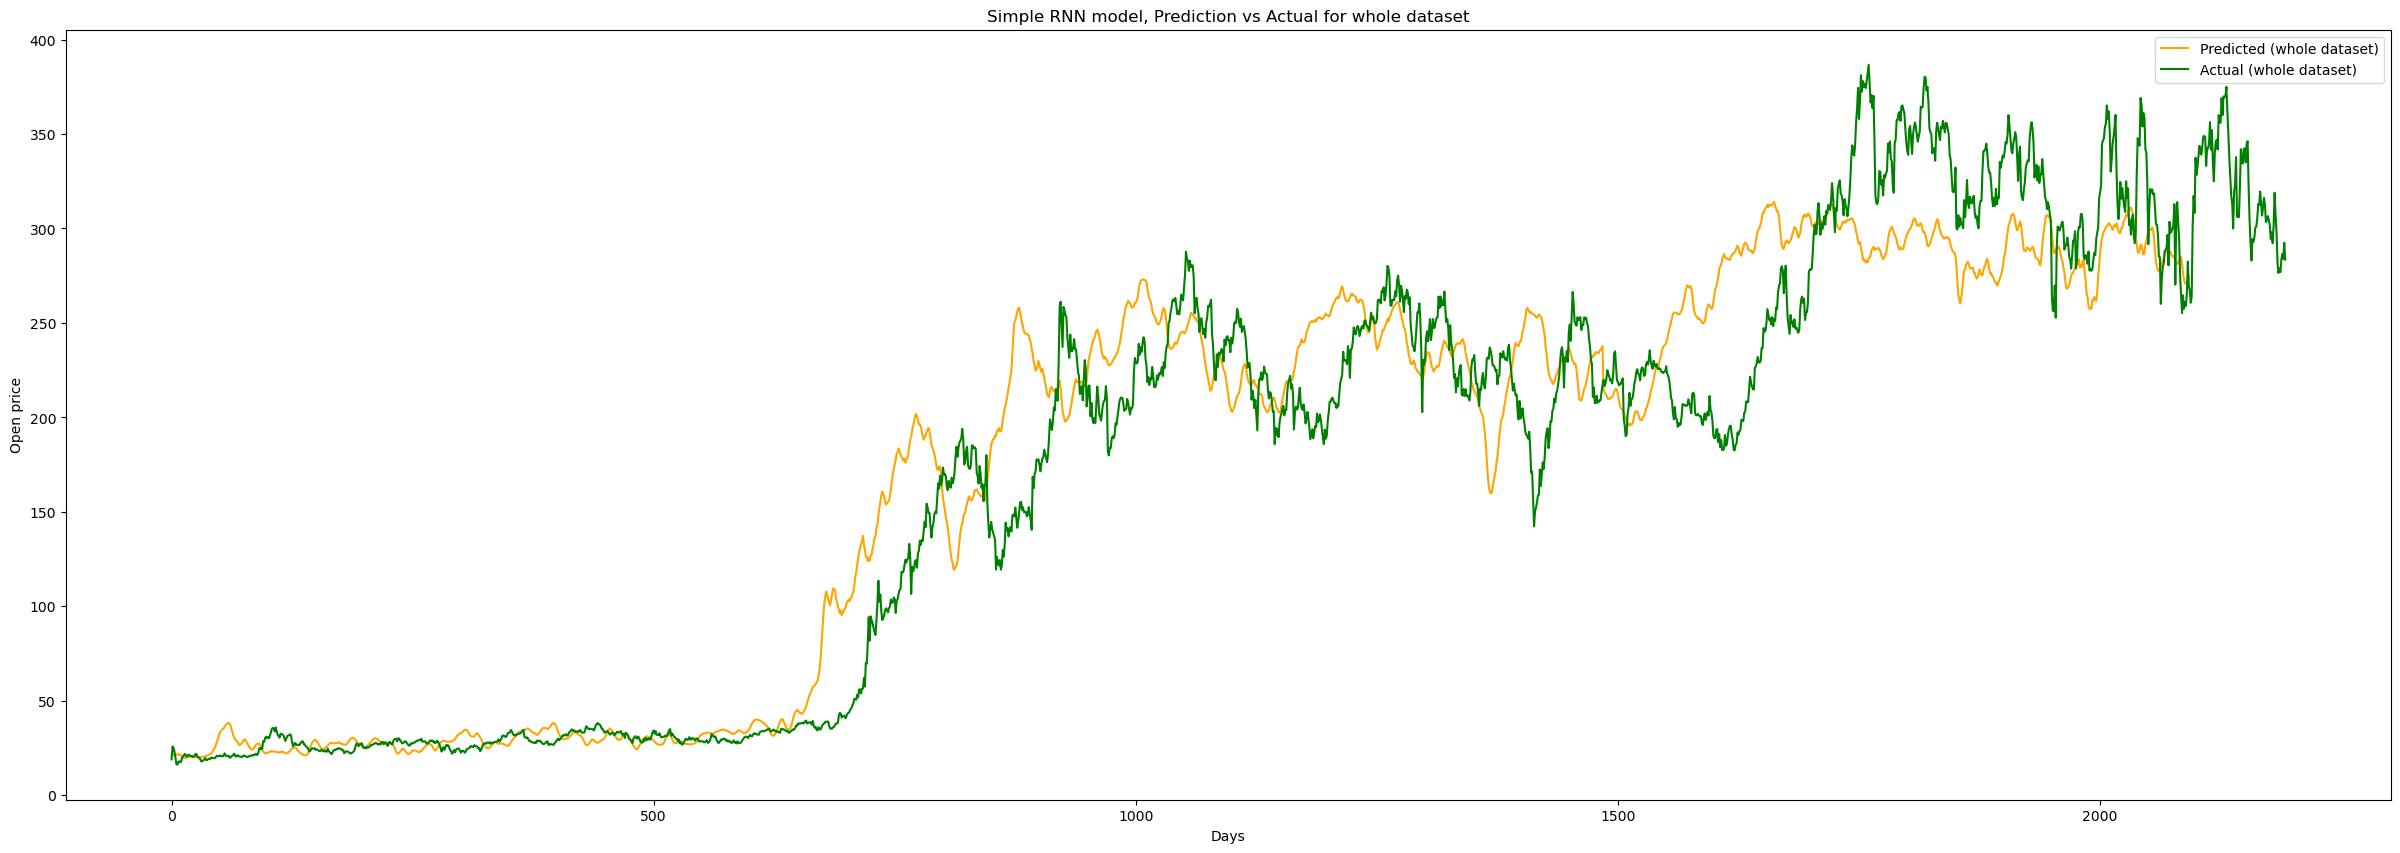

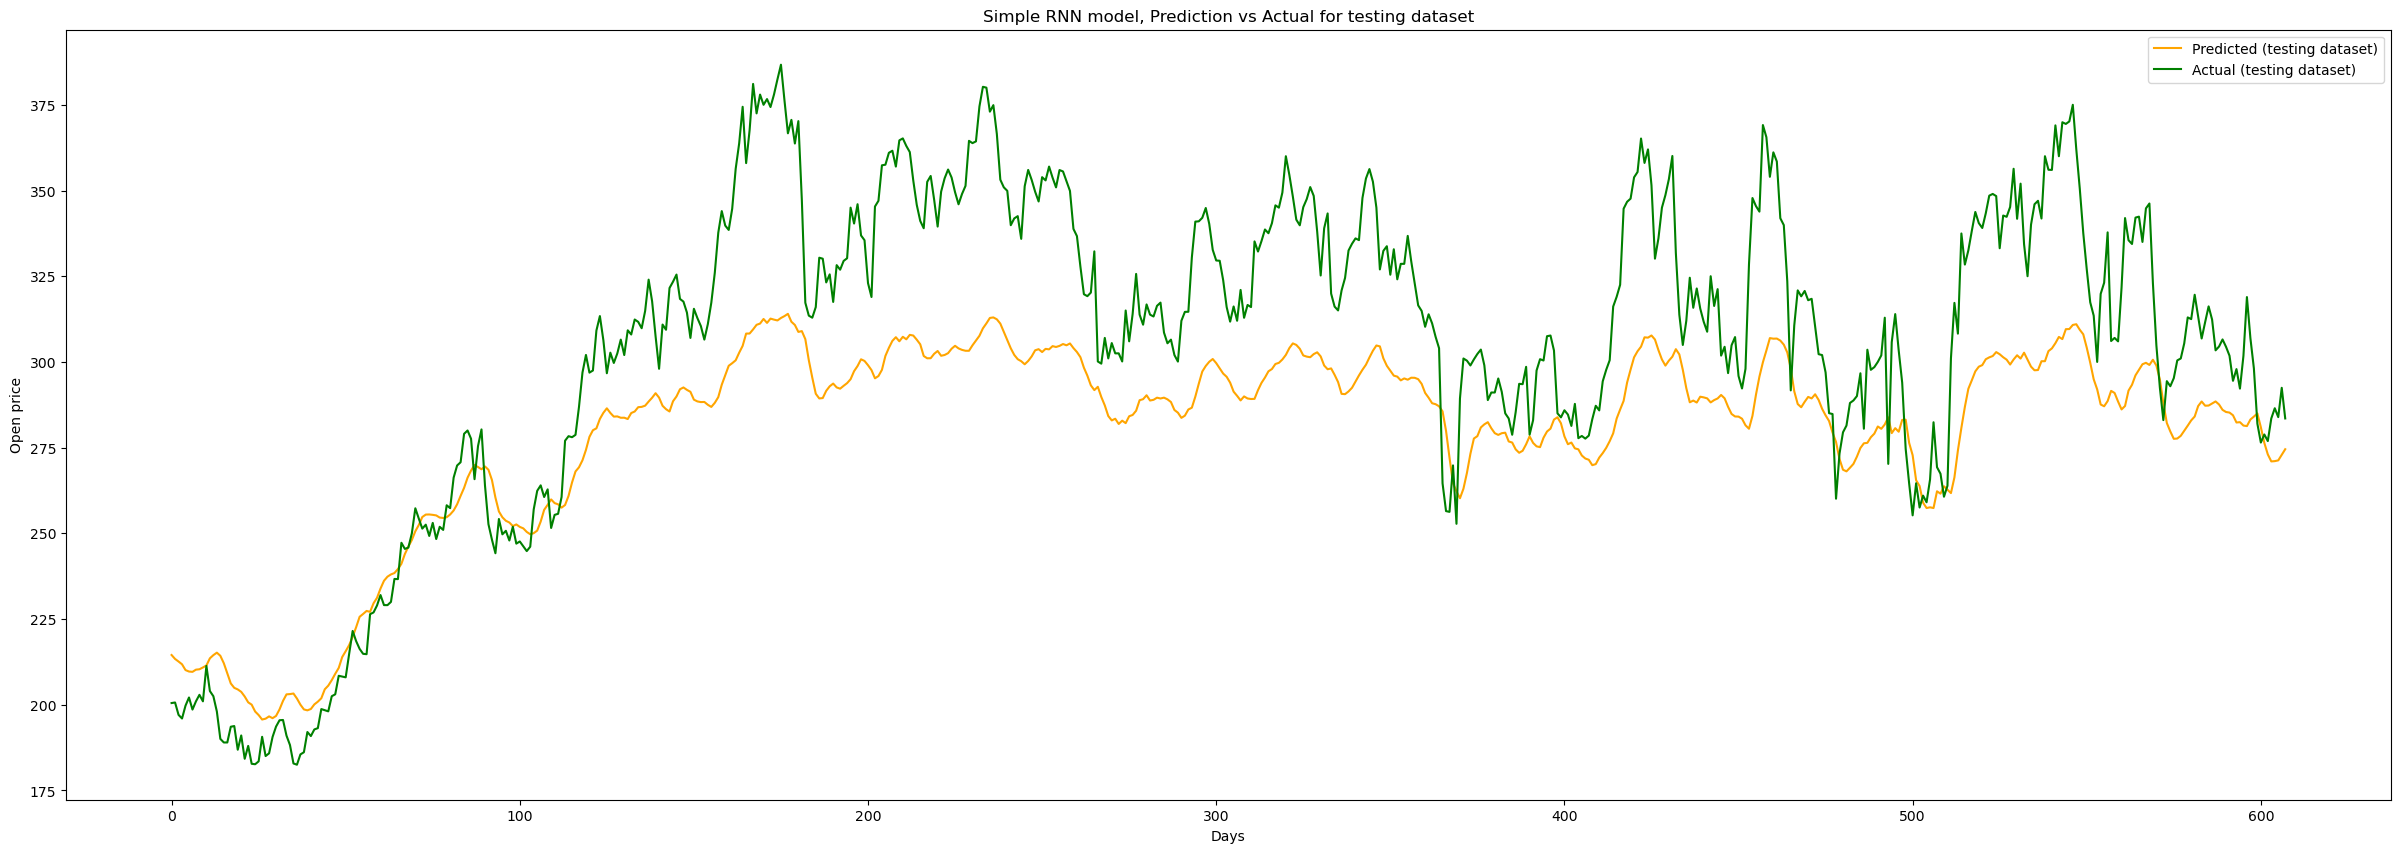

Mean: 175.65288193935237
Correlation between Actual and Predicted Values: 0.9582555924777576
47/47 [==============================] - 0s 7ms/step
RMSE on Training Set: 0.03242822092821593
RMSE on Test Set: 32.85405919166733


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv("Tesla.csv")

# Split dataset
length_train = round(len(data) * 0.7)
train_data = data[:length_train]['Open'] 
validation_data = data[length_train:]['Open']

# Normalize
scaler = MinMaxScaler(feature_range = (0,1))
dataset_train_scaled = scaler.fit_transform(train_data.values.reshape(-1,1))

# Create X_train and y_train
time_step = 50
X_train = np.array([dataset_train_scaled[i-time_step:i,0] for i in range(time_step, length_train)])
y_train = np.array([dataset_train_scaled[i,0] for i in range(time_step, length_train)])

# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# Create RNN model
regressor = Sequential()
regressor.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

# Compile and fit RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Predictions
y_pred = scaler.inverse_transform(regressor.predict(X_train))

# Validation data
scaled_dataset_validation =  scaler.transform(validation_data.values.reshape(-1,1))

# Create X_test and y_test
X_test = np.array([scaled_dataset_validation[i-time_step:i,0] for i in range(time_step, len(scaled_dataset_validation))])
y_test = np.array([scaled_dataset_validation[i,0] for i in range(time_step, len(scaled_dataset_validation))])

# Reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Predictions with X_test data
y_pred_of_test = scaler.inverse_transform(regressor.predict(X_test))

# Visualisation
plt.figure(figsize = (30,10))
plt.plot(np.concatenate([y_pred, y_pred_of_test]), label = "Predicted (whole dataset)", c = "orange")
plt.plot(data['Open'].values, label = "Actual (whole dataset)", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction vs Actual for whole dataset")
plt.legend()
plt.show()

plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "Predicted (testing dataset)", c = "orange")
plt.plot(data['Open'].values[-len(y_pred_of_test):], label = "Actual (testing dataset)", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction vs Actual for testing dataset")
plt.legend()
plt.show()

# Calculate the mean of the 'rate' column
mean_rate = data['Open'].mean()
print(f"Mean: {mean_rate}")

# Calculate the correlation between the actual and predicted values
correlation = np.corrcoef(data['Open'].values[-len(y_pred_of_test):], y_pred_of_test[:, 0])[0, 1]
print(f"Correlation between Actual and Predicted Values: {correlation}")

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, regressor.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(data['Open'].values[-len(y_pred_of_test):], y_pred_of_test))

print(f"RMSE on Training Set: {rmse_train}")
print(f"RMSE on Test Set: {rmse_test}")


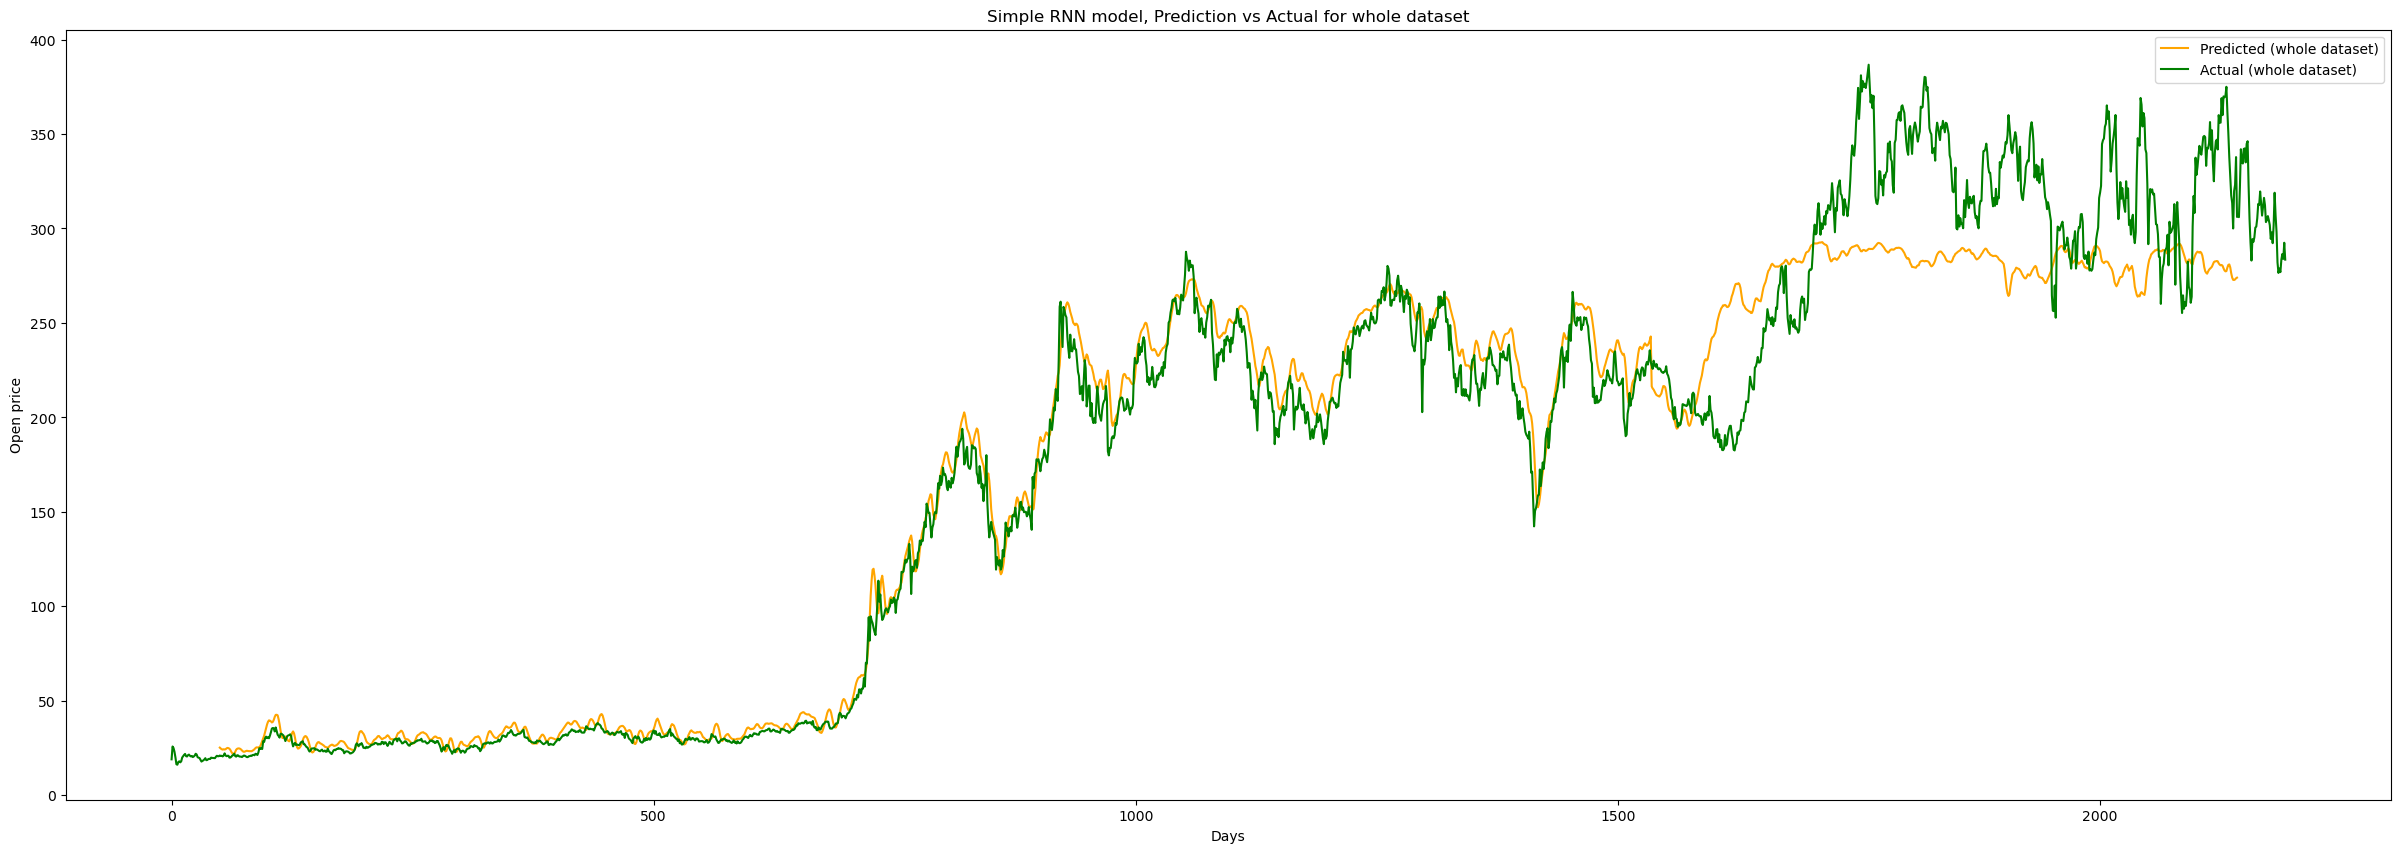

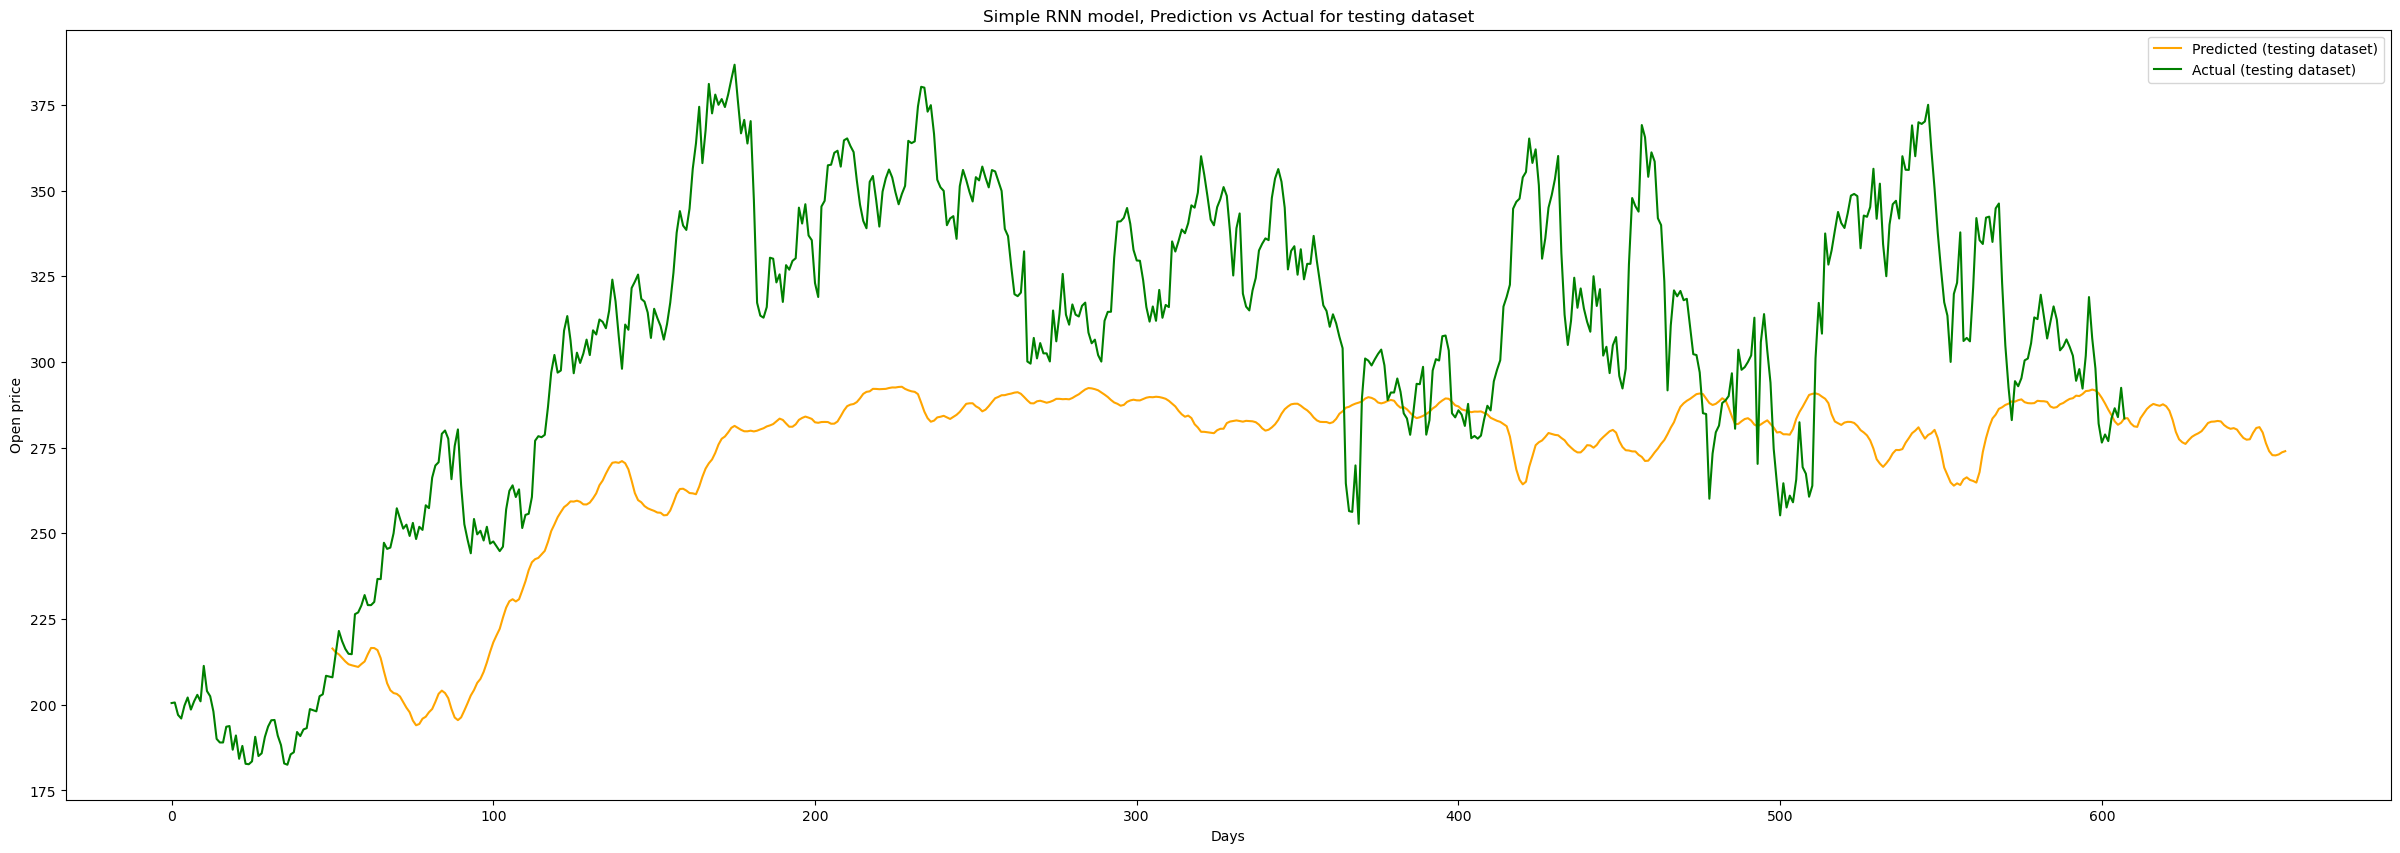

In [104]:
# Visualisation
plt.figure(figsize = (30,10))
plt.plot(np.concatenate([np.full((time_step,1), np.nan), y_pred, y_pred_of_test]), label = "Predicted (whole dataset)", c = "orange")
plt.plot(data['Open'].values, label = "Actual (whole dataset)", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction vs Actual for whole dataset")
plt.legend()
plt.show()

plt.figure(figsize = (30,10))
plt.plot(np.concatenate([np.full((time_step,1), np.nan), y_pred_of_test]), label = "Predicted (testing dataset)", c = "orange")
plt.plot(data['Open'].values[-len(y_pred_of_test):], label = "Actual (testing dataset)", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction vs Actual for testing dataset")
plt.legend()
plt.show()


In [108]:
from sklearn.metrics import r2_score
# Calculate R2 Score
r2_train = r2_score(y_train, regressor.predict(X_train))
r2_test = r2_score(data['Open'].values[-len(y_pred_of_test):], y_pred_of_test)

print(f"R2 Score on Training Set: {r2_train}")
print(f"R2 Score on Test Set: {r2_test}")

47/47 [==============================] - 1s 16ms/step
R2 Score on Training Set: 0.9911939939116864
R2 Score on Test Set: 0.5225312616108833
